## **Ejemplo 1**

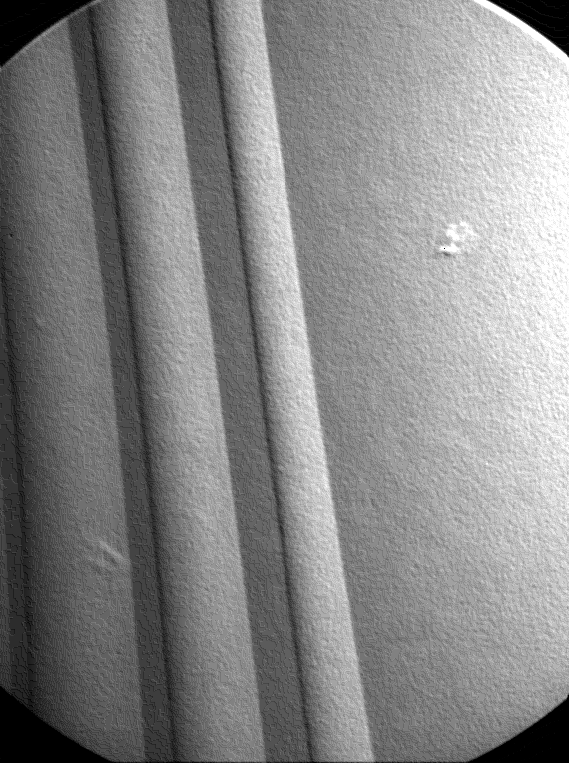

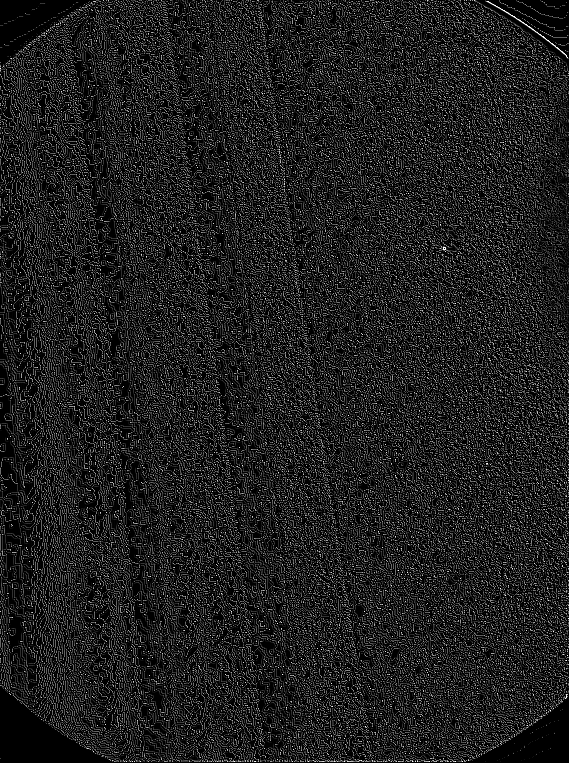

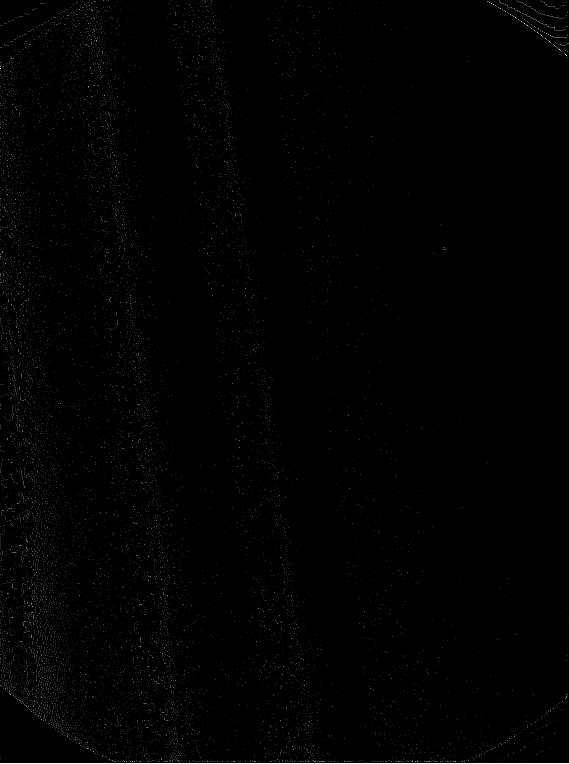

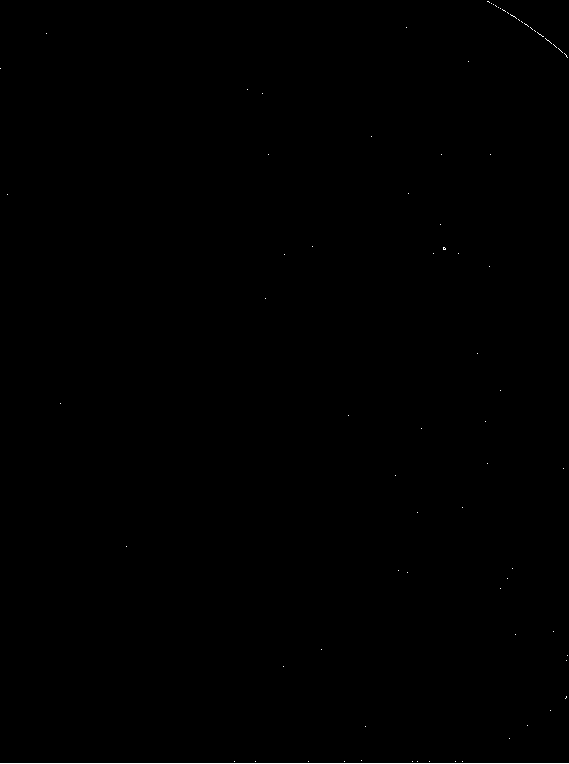

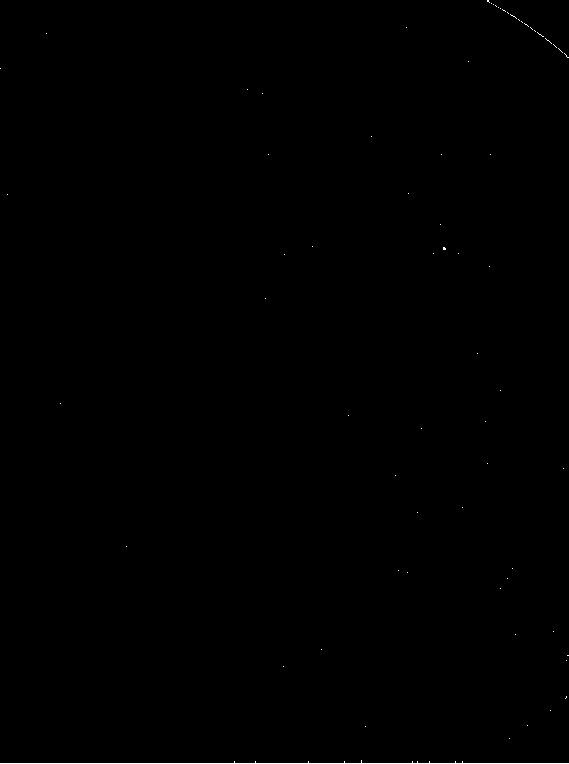

In [32]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


img = cv2.imread("turbine_blade_black_dot.png", 0) 
kernel = np.ones((3, 3))*-1
kernel[1,1] = 8

kernel2 = np.ones((3, 3))*-1
kernel2[1,1] = 7

cv2_imshow(img)

img_det = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
cv2_imshow(img_det)
img_det2 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)
cv2_imshow(img_det2)
thresh = cv2.threshold(img_det,250,255, cv2.THRESH_BINARY)[1]
cv2_imshow(thresh)


height, width = thresh.shape
max_x = 0
max_y = 0
max = 0

for y in range(2, height, 3):
  for x in range(2, width, 3):
    if np.sum(thresh[y-1:y+1, x-1:x+1]) > max:
      max = np.sum(thresh[y-1:y+1, x-1:x+1])
      max_x = x
      max_y = y

#print(max_x, max_y)

B_kernel = np.ones((3,3))
img_det_closing = cv2.erode(cv2.dilate(thresh, B_kernel, iterations=1), B_kernel, iterations=1)

cv2_imshow(img_det_closing)

## **Ejemplo 2**

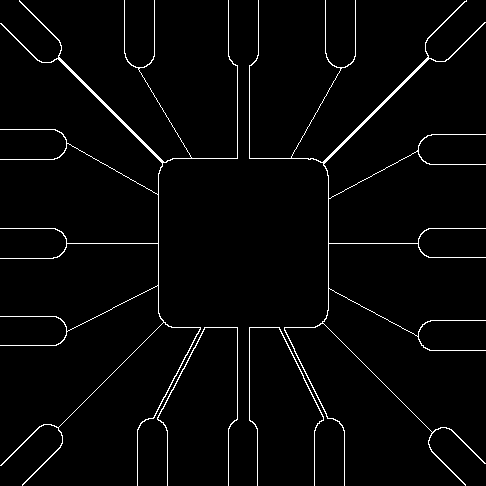

In [23]:
img = cv2.imread("wirebond_mask.png",0)
img = img/255

kernel_h = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
kernel_v = np.transpose(kernel_h)
kernel_45p = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
kernel_45n = np.fliplr(kernel_45p)

imgh = cv2.filter2D(img,-1,kernel_h)
imgv = cv2.filter2D(img,-1,kernel_v)
img45p = cv2.filter2D(img,-1,kernel_45p)
img45n = cv2.filter2D(img,-1,kernel_45n)

img_f = imgh + imgv + img45p + img45n
img_f *= 255

cv2_imshow(img_f)

## **Ejemplo 3**

Text(0.5, 1.0, '|Gx| + |Gy|')

<Figure size 432x288 with 0 Axes>

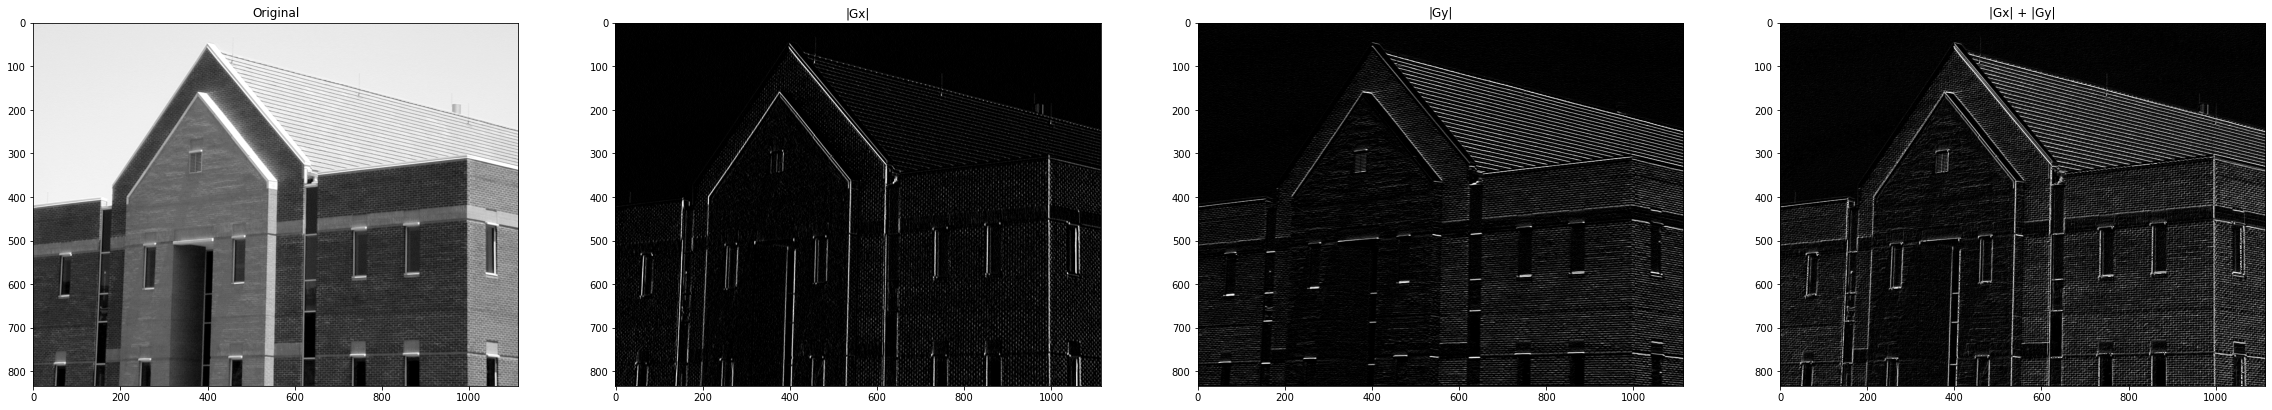

In [27]:
img = cv2.imread("building.png",0) # read as gray

k1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) 
k2 = np.transpose(k1)

Gx = cv2.filter2D(img,-1,k1)
Gy = cv2.filter2D(img,-1,k2)
img_f = Gx+Gy

plt.figure() 
f, axarr = plt.subplots(1,4)
f.set_size_inches(40, 30)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
axarr[1].imshow(Gx, cmap="gray")
axarr[1].set_title('|Gx|')
axarr[2].imshow(Gy, cmap="gray")
axarr[2].set_title('|Gy|')
axarr[3].imshow(img_f, cmap="gray")
axarr[3].set_title('|Gx| + |Gy|')

## **Ejemplo 4**

Text(0.5, 1.0, '|Gx| + |Gy|')

<Figure size 432x288 with 0 Axes>

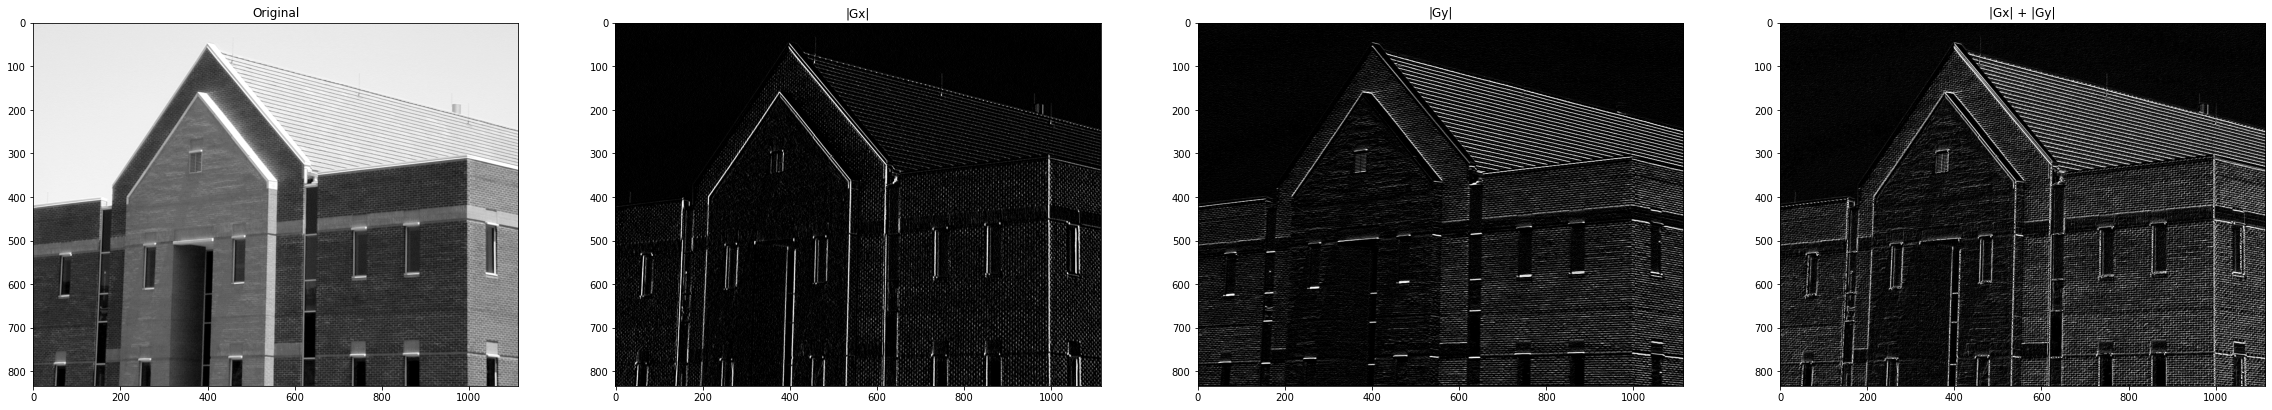

In [29]:
img = cv2.imread("building.png",0) # read as gray

k1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
k2 = np.transpose(k1)

Gx = cv2.filter2D(img,-1,k1)
Gy = cv2.filter2D(img,-1,k2)
img_f = Gx+Gy

# show figure
plt.figure() 
f, axarr = plt.subplots(1,4)
f.set_size_inches(40, 30)
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
axarr[1].imshow(Gx, cmap="gray")
axarr[1].set_title('|Gx|')
axarr[2].imshow(Gy, cmap="gray")
axarr[2].set_title('|Gy|')
axarr[3].imshow(img_f, cmap="gray")
axarr[3].set_title('|Gx| + |Gy|')